# Load libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import accuracy_score , classification_report




# load the data


In [2]:
df_Stroke =pd.read_csv("/kaggle/input/brain-stroke-dataset/brain_stroke.csv")


In [3]:
df_Stroke.shape 

(4981, 11)

In [4]:
df_Stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df_Stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1

In [6]:
df_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [7]:

df_Stroke.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
count  4981.000000  4981.000000  
mean     28.498173     0.049789  
std       6.790464     0.217531  
min      14.000000     0.000000  
25%      23.700000     0.000000  
50%      28.100000     0.000000  
75%      32.600000     0.000000  
max      48.900000     1.000000

In [8]:
df_Stroke.duplicated().sum()

0

In [9]:
df_Stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df_Stroke['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)

/tmp/ipykernel_18/3981196944.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_Stroke['stroke'].replace({0: 'The patient did not have a stroke', 1: 'The patient had a stroke'}, inplace=True)


In [11]:
df_Stroke.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  \
0          Urban             228.69  36.6  formerly smoked   
1          Rural             105.92  32.5     never smoked   
2          Urban             171.23  34.4           smokes   
3          Rural             174.12  24.0     never smoked   
4          Urban             186.21  29.0  formerly smoked   

                     stroke  
0  The patient had a stroke  
1  The patient had a stroke  
2  The patient had a stroke  
3  The patient had a stroke  
4  The patient had a stroke

In [12]:
df_Stroke['stroke'].value_counts()

stroke
The patient did not have a stroke    4733
The patient had a stroke              248
Name: count, dtype: int64

# Data visualization


In [13]:
df_cat=df_Stroke[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

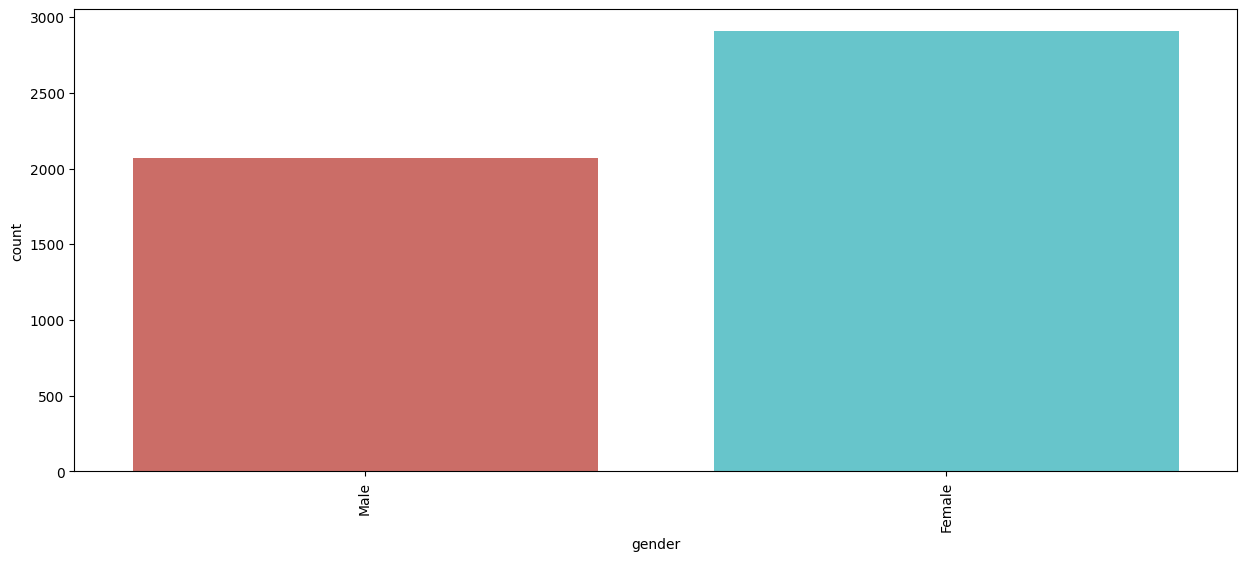

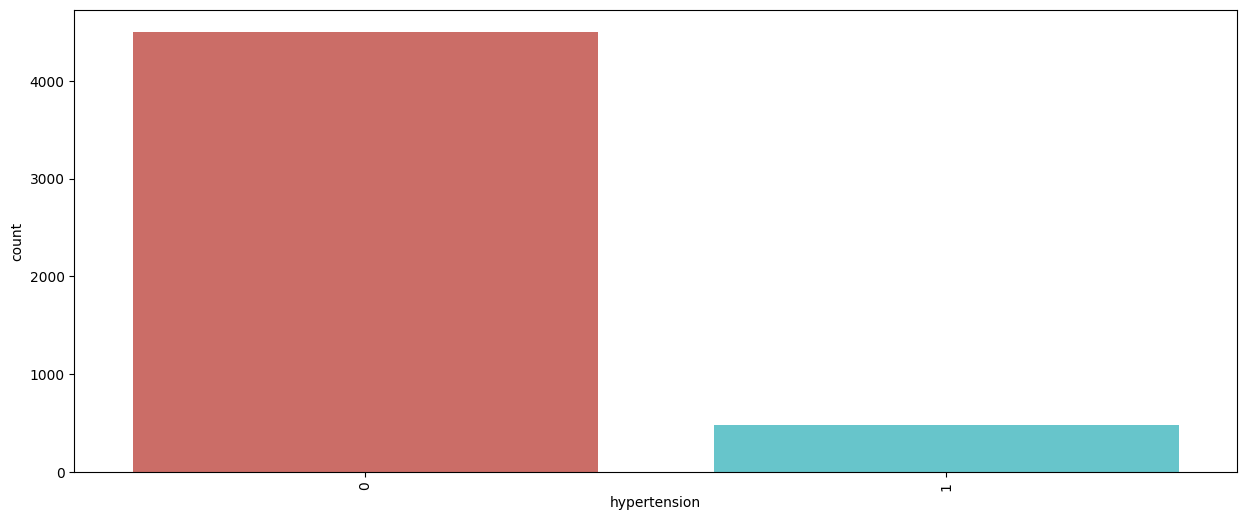

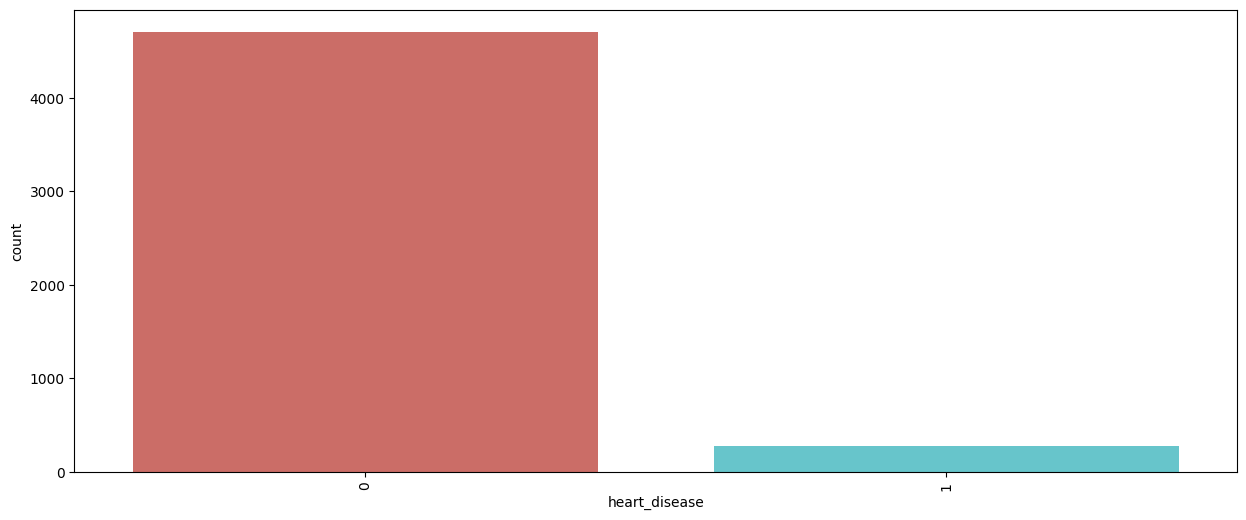

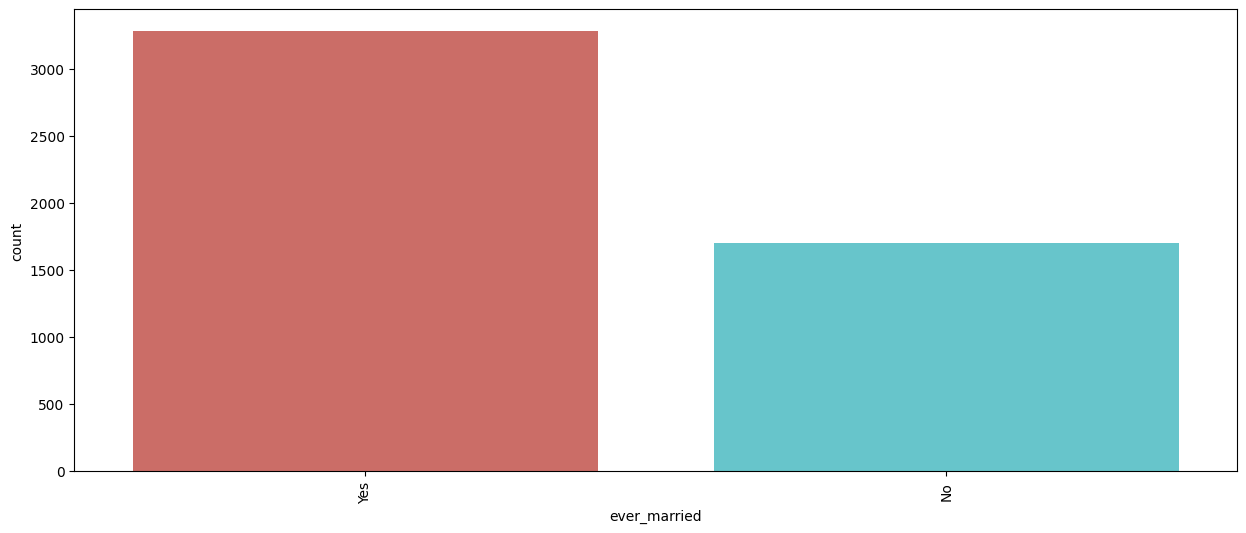

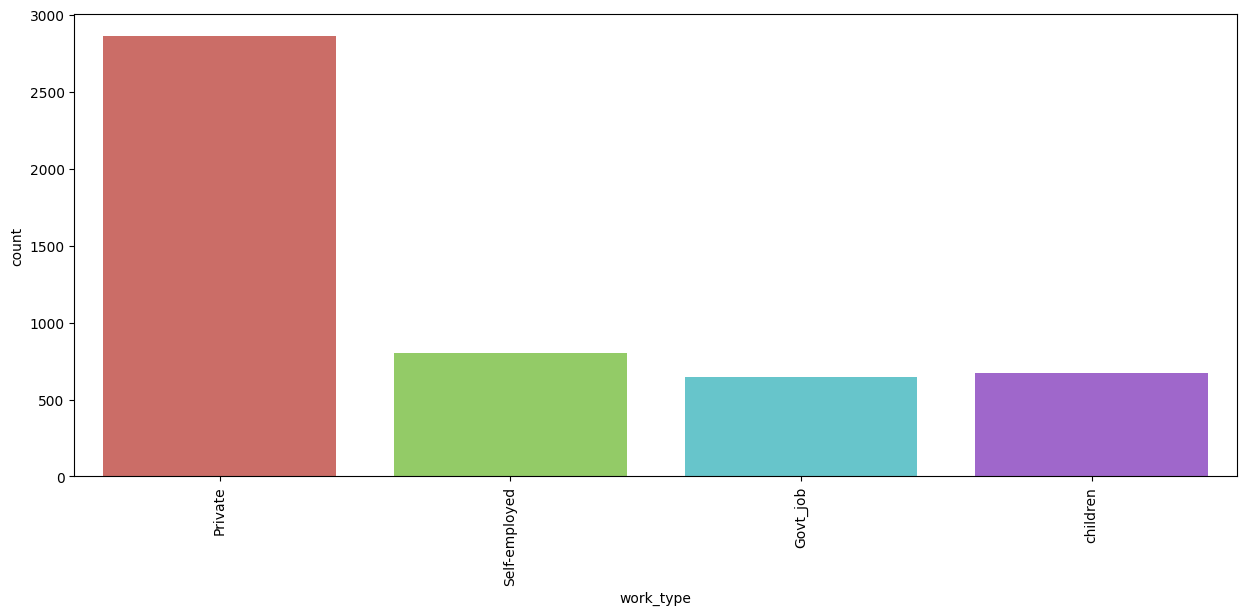

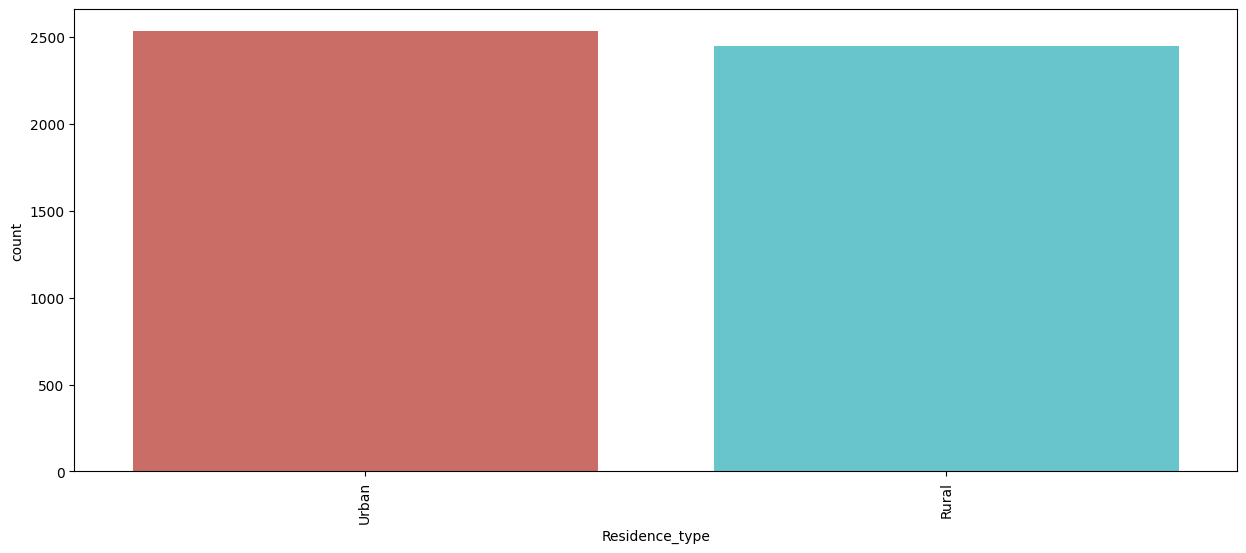

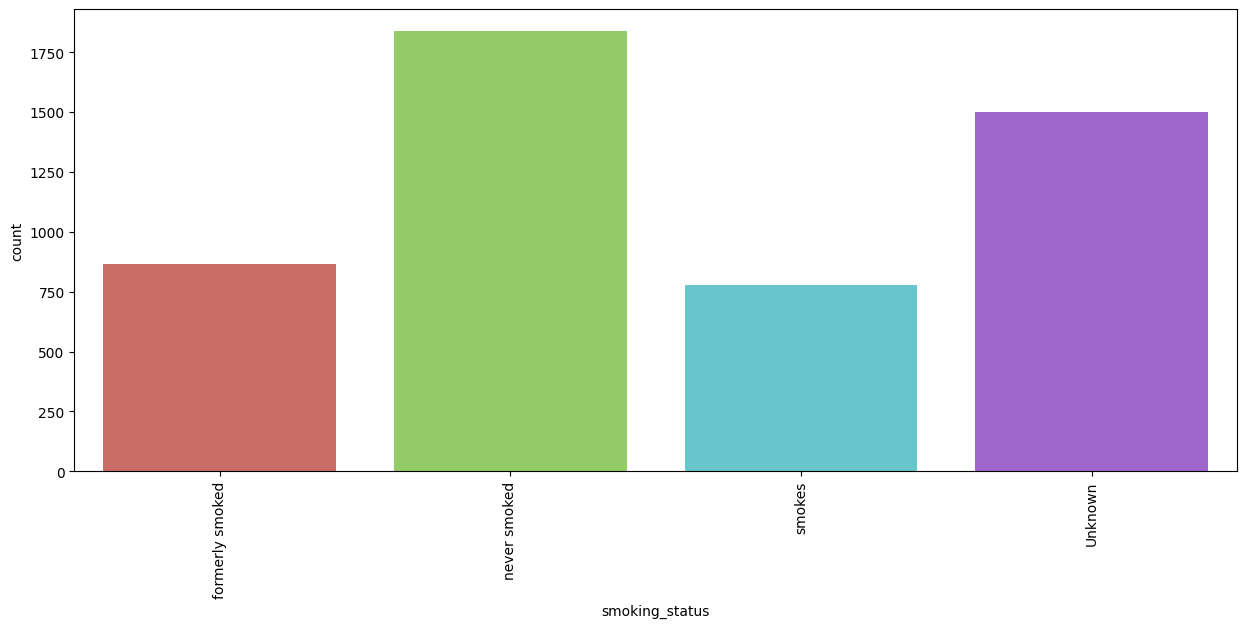

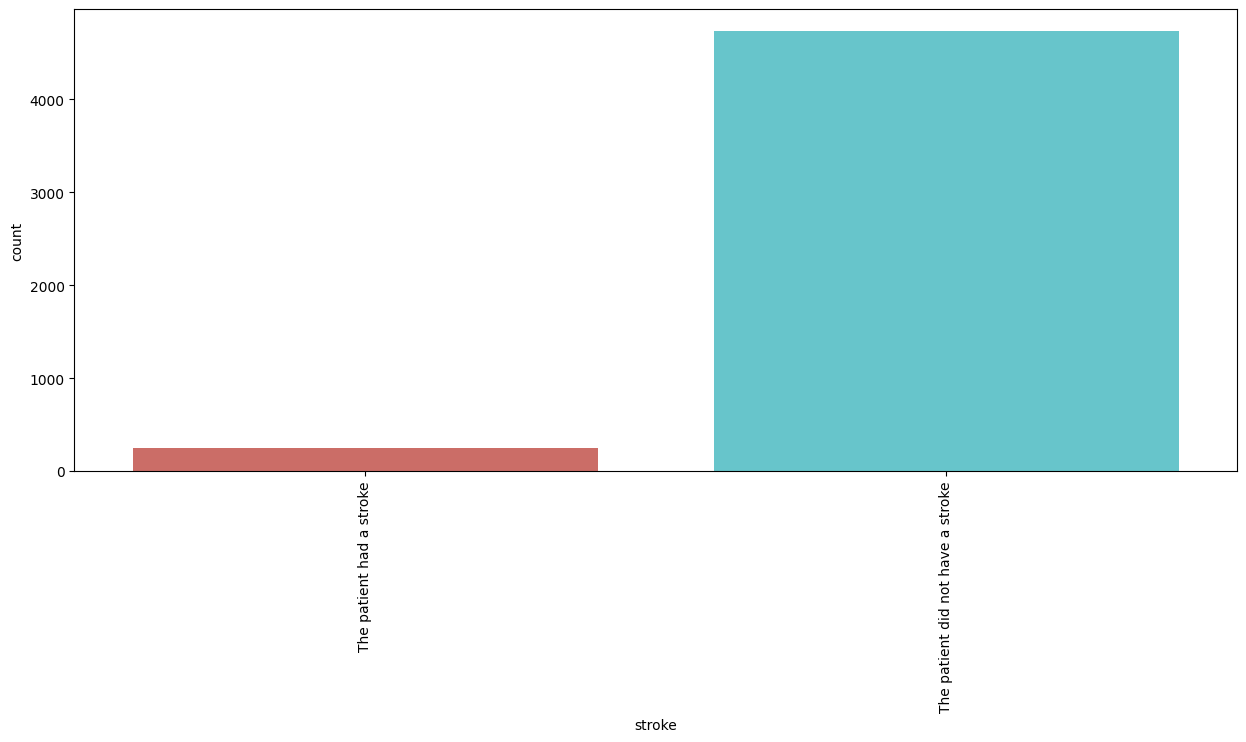

In [14]:
for i in df_cat.columns:
    plt.figure(figsize = (15,6))
    sns.countplot(x=df_cat[i], data = df_cat, palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

# Age distribution of participants in the data set

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


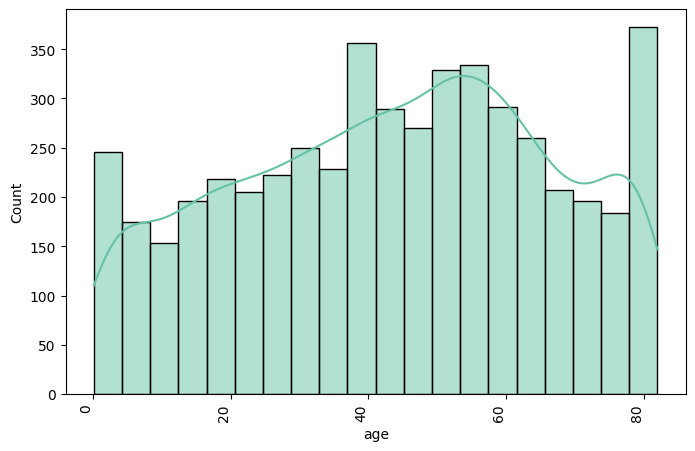

In [15]:

plt.figure(figsize=(8, 5))
palette = sns.color_palette("Set2")
sns.histplot(df_Stroke['age'], kde=True, color=palette[0])
plt.xticks(rotation=90, ha="right")
plt.show()


 
 # Exploring Stroke Occurrence Across Different Age Groups

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Figure size 2000x1000 with 0 Axes>

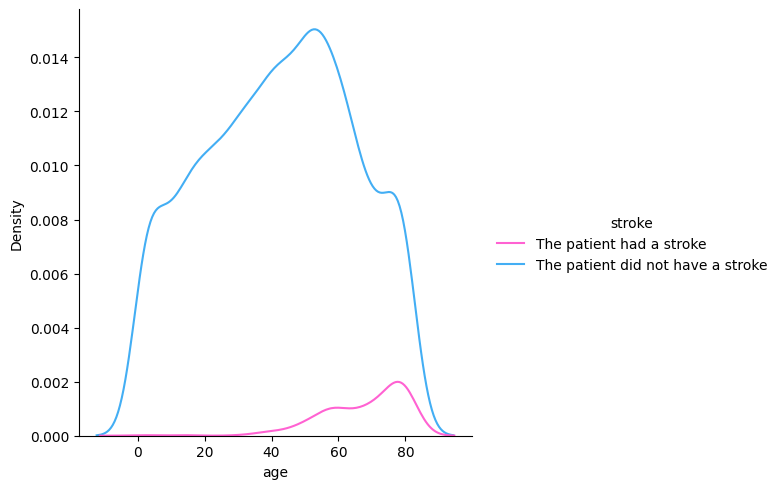

In [16]:
my_palette = ["#FF62D2", "#43AEF4"]

plt.figure(figsize=(20,10))

sns.displot(data=df_Stroke, x="age", hue="stroke", kind="kde",palette=my_palette)


# Comparison of age distribution between individuals affected and unaffected by stroke

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

(array([-20.,   0.,  20.,  40.,  60.,  80., 100.]),
 [Text(-20.0, 0, 'âˆ’20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100')])

<Figure size 2000x1000 with 0 Axes>

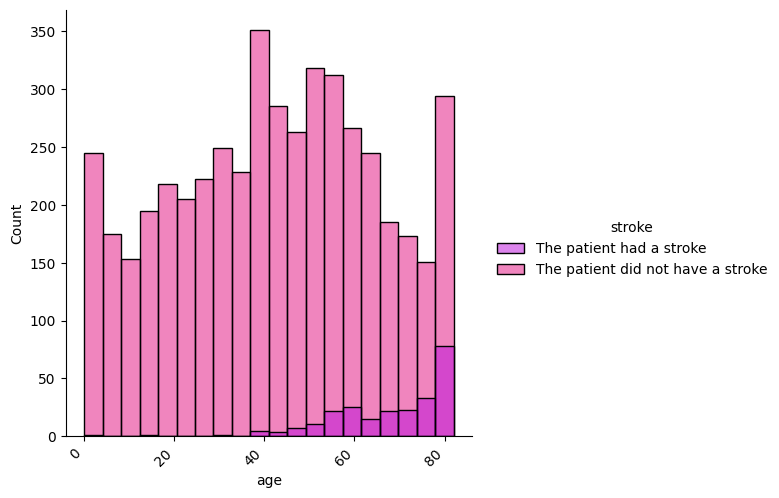

In [17]:
plt.figure(figsize=(20,10))
palette = sns.color_palette(["#BA0ADA" , "#E20C7E"])
sns.displot(data=df_Stroke, x="age", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: ylabel='Density'>

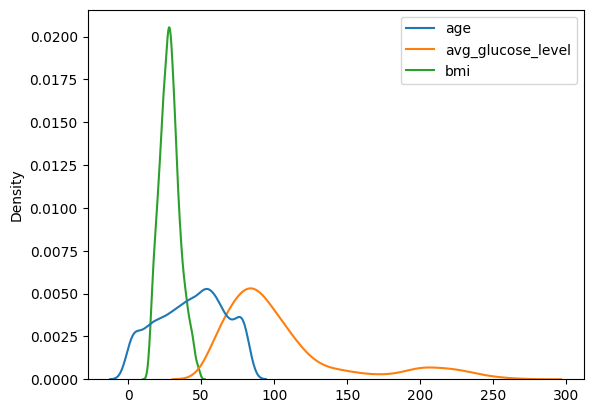

In [18]:
numerical_data = df_Stroke[['age','avg_glucose_level','bmi']]
sns.kdeplot(data=numerical_data)

# Impact of Work Type on Stroke Incidence

/tmp/ipykernel_18/1259764941.py:3: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(na

([0, 1, 2, 3],
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

<Figure size 1200x800 with 0 Axes>

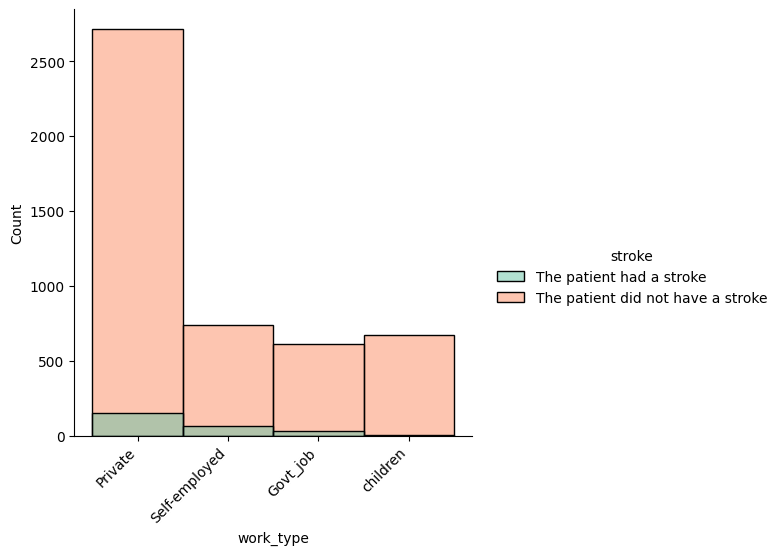

In [19]:
plt.figure(figsize=(12,8))
palette = sns.color_palette("Set2")
sns.displot(data=df_Stroke, x="work_type", hue="stroke",bins=20, palette=palette)
plt.xticks(rotation=45, ha="right")


# Encoding Step

In [20]:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df_Stroke.columns:
    if df_Stroke[col].dtype=='object':
        df_Stroke[col]=le.fit_transform(df_Stroke[col])

In [21]:
df_Stroke.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1

# Feature Scaling :

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for col_name in df_Stroke.columns:
    if df_Stroke[col_name].nunique() > 5:
        df_Stroke[col_name] = scaler.fit_transform(df_Stroke[[col_name]])

# Train model


In [23]:
X = df_Stroke.drop("stroke",axis=1)
y =df_Stroke['stroke']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

# LogisticRegression


In [25]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))

Logistic Regression accuracy score with all the features: 94.7826
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DecisionTreeClassifier

In [26]:
dec_clf=DecisionTreeClassifier(criterion='gini',random_state=3,max_depth=5)
dec_clf.fit(X_train,y_train)
y_pred=dec_clf.predict(X_test)
print('DecisionTreeClassifier accuracy score:', dec_clf.score(X_test, y_test)*100)
print(classification_report(y_test, y_pred))

DecisionTreeClassifier accuracy score: 94.31438127090301
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1417
           1       0.29      0.06      0.11        78

    accuracy                           0.94      1495
   macro avg       0.62      0.53      0.54      1495
weighted avg       0.92      0.94      0.93      1495



# RandomForestClassifier

In [27]:
rand_clf=RandomForestClassifier(n_estimators=20,criterion="entropy")
rand_clf.fit(X_train,y_train)
y_pred=rand_clf.predict(X_test)
print('RandomForestClassifier accuracy score:', rand_clf.score(X_test, y_test)*100)
print(classification_report(y_test, y_pred))


RandomForestClassifier accuracy score: 94.58193979933111
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



# SVM

In [28]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Accuracy for  SVM is ',metrics.accuracy_score(y_pred,y_test)*100)
print(classification_report(y_test, y_pred))

Accuracy for  SVM is  94.78260869565217
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# NaiveBayes

In [29]:
NaiveBayes=GaussianNB()
NaiveBayes.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(y_pred,y_test))
print(classification_report(y_test, y_pred))

The accuracy of the NaiveBayes is 0.9478260869565217


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1417
           1       0.00      0.00      0.00        78

    accuracy                           0.95      1495
   macro avg       0.47      0.50      0.49      1495
weighted avg       0.90      0.95      0.92      1495



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# Bagging Ensemble

In [30]:
from sklearn.ensemble import BaggingClassifier
deci_clf=RandomForestClassifier()
clf_bagging=BaggingClassifier(estimator=deci_clf ,n_estimators=20,random_state=42)
clf_bagging.fit(X_train,y_train)
y_pred=clf_bagging.predict(X_test)
print('The accuracy of the bagging classifier is',metrics.accuracy_score(y_pred,y_test))


The accuracy of the bagging classifier is 0.9471571906354515


# Boosting Ensemble 

In [31]:
from sklearn.ensemble import AdaBoostClassifier
decs_clf=RandomForestClassifier()
clf_boosting=AdaBoostClassifier(estimator=decs_clf ,n_estimators=20 ,random_state=42)
clf_boosting.fit(X_train,y_train)
y_pred=clf_boosting.predict(X_test)
print('The accuracy of the Boosting classifier is',metrics.accuracy_score(y_pred,y_test))


The accuracy of the Boosting classifier is 0.945819397993311


# VotingClassifier

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
ensemble_lin_rbf=VotingClassifier(estimators=[
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(X_train,y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test,y_test))
cross=cross_val_score(ensemble_lin_rbf,X,y, cv = 10,scoring = "accuracy")
print('The cross validated score is :',cross.mean())

The accuracy for ensembled model is: 0.9478260869565217
The cross validated score is : 0.9498092570683536


# Models Accuracy Comparison

In [33]:
from sklearn.model_selection import KFold #for K-fold cross validation
kfold = KFold(n_splits=10) # k=10, split the data into 10 equal parts
cv_mean=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

CV Mean       Std
Linear Svm           0.950285  0.124694
Radial Svm           0.950285  0.124694
Logistic Regression  0.950285  0.124694
Decision Tree        0.903094  0.104846
Naive Bayes          0.851881  0.078384
Random Forest        0.948477  0.124116

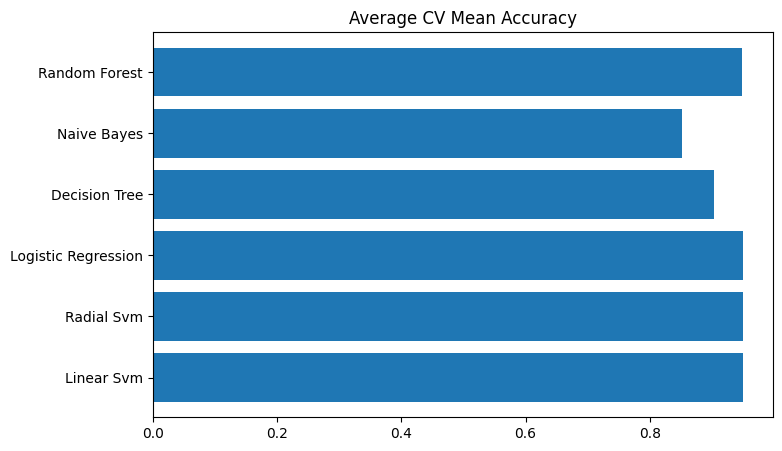

In [34]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()